# 2．Google Colabによる実行環境


（以下の節番号は，書籍での番号とそろえてあるため，本IPythonNotebook内では値が飛んでいることに注意．）

## 2.2 Google Colab の使い方

### 2.2.4 Markdown


Markdownは，シンプルなマークアップ言語である．以下のようなマークアップを行うことが可能である．

注意：ヘッダ指定（#レベル１など）は，このipynbの構成に影響を与えるので，実行は省く．
以下の例では，実際にMarkdown記法で入力された結果が表示されている．セルをダブルクリックすることで，実際のMarkdown記法が確認できる．

**ボールド**

＊イタリック* or _イタリック_

~~打ち消し線~~

`１行コード`

> インデント１段
>>> インデント３段

* リスト１
* リスト１


- リスト２
- リスト２

[テキスト](URL)

![代替テキスト](画像URL).  
↑画像が無いので，代替テキストが表示されている

$y = 0.1 x$

---

___

***


第１列の名前 | 第２列の名前
--- | ---
１行，１列 | １行，２列
２行，１列 | ２行，２列


### 2.2.5 コマンド実行


コマンドを実行するときには，半角感嘆符`!`を使用する．

In [1]:
!python -V

Python 3.7.10


### 2.2.6 仮想環境のスペック確認

#### CPU

In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

#### ストレージ

In [3]:
# strage
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   31G   38G  45% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        75G   32G   43G  43% /opt/bin
tmpfs           6.4G   24K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


#### RAM

In [4]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        554M         10G        1.0M        2.0G         11G
Swap:            0B          0B          0B


#### GPU

編集 > ノートブックの設定 もしくは ランタイム > ランタイムのタイプを変更 を選択し，「ハードウェアアクセラレータ」を GPU とすることで，GPUを利用することができる．

In [5]:
!nvidia-smi

Sat Feb 27 07:13:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### OS

In [6]:
!cat /etc/issue

Ubuntu 18.04.5 LTS \n \l



### 2.2.7 フォーム

In [7]:
#@title フォームのタイトル

text = '初期表示テキスト' #@param {type:"string"}
dropdown = '１' #@param ["１", "２", "３"]
opt = '書換可' #@param ["１", "２", "３"] {allow-input: true}

print(text)
print(dropdown)
print(opt)

初期表示テキスト
１
書換可


## 2.3 ストレージ・データベースとの接続

### 2.3.1 ローカルファイル

ローカルファイルのアップロード

In [8]:
from google.colab import files

uploaded = files.upload()

Saving test01.txt to test01.txt
Saving test02.txt to test02.txt
Saving テスト０３.txt to テスト０３.txt


ファイルのローカルへのダウンロード

In [9]:
from google.colab import files

with open('test04.txt', 'w') as f:
  f.write('ファイルの内容（ダミーテキスト）')

files.download('test04.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.3.2 GoogleDrive

GoogleDriveとの連携を行うモジュール drive をインポートし，GoogleDriveをマウントする．（サーバに接続する毎に，再度やり直す必要がある）

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


もしくは，画面左の　フォルダマークのアイコンをクリックし，「ドライブをマウント」を選択することでも，GoogleDriveをマウントするコードセルが挿入され，実行することで，ドライブをマウントすることが可能である．

### 2.3.3 外部（Web上）のデータ

urlopen() を用いてデータを読み込む．

head() は，pandasの機能で，データの最初数行を表示するものである．

In [11]:
from urllib.request import urlopen
from io import StringIO
import pandas as pd

data = urlopen("https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524030&fileKind=1").read().decode('MS932')
df = pd.read_csv(StringIO(data), encoding='MS932')

df.head()

,元号,和暦（年）,西暦（年）,年齢5歳階級,人口（総数）,人口（男）,人口（女）
0,大正,9.0,1920.0,総数,55963053.0,28044185.0,27918868.0
1,大正,9.0,1920.0,0～4歳,7457715.0,3752627.0,3705088.0
2,大正,9.0,1920.0,5～9歳,6856920.0,3467156.0,3389764.0
3,大正,9.0,1920.0,10～14歳,6101567.0,3089225.0,3012342.0
4,大正,9.0,1920.0,15～19歳,5419057.0,2749022.0,2670035.0


### 2.3.4 Kaggle

・Kaggleのインストール（現在のColabでは必要なし）

In [12]:
!pip install kaggle

・kaggle.json のアップロード

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayonari","key":"430ad3b104f7aab02e53cc5f0f5f6331"}'}

・設定用の隠しディレクトリの作成
・ファイルの移動

In [14]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

・ファイルのパーミションを変更

In [15]:
!chmod 600 ~/.kaggle/kaggle.json

・kaggleの動作チェック

In [16]:
!kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           3839  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-26 11:18:15           1864  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            367  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            223  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

・Kaggle上のデータセットのダウンロード

上の`kaggle datasets list`で得られたものをダウンロードする場合には，以下のコマンドを実行する．



In [17]:
!kaggle datasets download -d shivan118/healthcare-analytics

  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 107MB/s]


Kaggleにて，competitionsを検索，ダウンロードする場合には，それぞれ以下のコマンドを実行する．

In [18]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         77           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        161           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        373           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2460           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      19163           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4877           False  
connectx

In [19]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 35.3MB/s]
 55% 5.00M/9.16M [00:00<00:00, 10.1MB/s]
100% 9.16M/9.16M [00:00<00:00, 17.0MB/s]
 82% 5.00M/6.09M [00:00<00:00, 15.2MB/s]
100% 6.09M/6.09M [00:00<00:00, 17.5MB/s]


・データの展開

In [20]:
!unzip ./train.csv.zip -d ./digit-recognizer/
!unzip ./test.csv.zip -d ./digit-recognizer/

Archive:  ./train.csv.zip
  inflating: ./digit-recognizer/train.csv  
Archive:  ./test.csv.zip
  inflating: ./digit-recognizer/test.csv  


（・外に出ている sample_submission.csv を digit-recognizer ディレクトリに入れる）

In [21]:
!mv sample_submission.csv ./digit-recognizer/.

（・ダウンロードしたzipファイルを削除する）

In [22]:
!rm train.csv.zip test.csv.zip

Kaggle API のヘルプ表示

In [23]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


In [24]:
!kaggle competitions -h

usage: kaggle competitions [-h]
                           {list,files,download,submit,submissions,leaderboard}
                           ...

optional arguments:
  -h, --help            show this help message and exit

commands:
  {list,files,download,submit,submissions,leaderboard}
    list                List available competitions
    files               List competition files
    download            Download competition files
    submit              Make a new competition submission
    submissions         Show your competition submissions
    leaderboard         Get competition leaderboard information


In [25]:
!kaggle competitions download -h

usage: kaggle competitions download [-h] [-f FILE_NAME] [-p PATH] [-w] [-o]
                                    [-q]
                                    [competition]

optional arguments:
  -h, --help            show this help message and exit
  competition           Competition URL suffix (use "kaggle competitions list" to show options)
                        If empty, the default competition will be used (use "kaggle config set competition")"
  -f FILE_NAME, --file FILE_NAME
                        File name, all files downloaded if not provided
                        (use "kaggle competitions files -c <competition>" to show options)
  -p PATH, --path PATH  Folder where file(s) will be downloaded, defaults to current working directory
  -w, --wp              Download files to current working path
  -o, --force           Skip check whether local version of file is up to date, force file download
  -q, --quiet           Suppress printing information about the upload/download progress

## 2.4 GPUとTPUの利用

### 2.4.2 GPUの利用

[編集] > [ノートブックの設定] もしくは [ランタイム] > [ランタイムのタイプを変更] を選択し，「ハードウェアアクセラレータ」を GPU とすることで，GPUを利用することができる．

その後，GPUが動作しているか確認．

In [26]:
!nvidia-smi

Sat Feb 27 07:21:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2.4.3 TPUの利用

編集 > ノートブックの設定 もしくは ランタイム > ランタイムのタイプを変更 を選択し，「ハードウェアアクセラレータ」を TPU とすることで，GPUを利用することができる．

その後，tensorflowを用いてTPUとの接続を行う．

In [ ]:
# TPUとの接続（TensorFlow）とTensorFlowのバージョン確認
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

# TPU関連のエラー出力抑制
import logging
tf.get_logger().setLevel(logging.ERROR) 

try:
  # TPU検出
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  print('TPU起動 ', tpu.cluster_spec().as_dict()['worker'])

except ValueError:
  raise BaseException('ERROR: TPU接続エラー')

# TPU設定
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

## 2.5 Google Colab のその他の設定

### 2.5.1 各種ライブラリのバージョンを合わせる

・Google Colab に含まれるPythonライブラリ一覧

In [28]:
!pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.10.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
asgiref                       3.3.1         
astor                         0.8.1         
astropy                       4.2           
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         20.3.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.0         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis      

■ライブラリの情報表示

In [29]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorflow-estimator, opt-einsum, typing-extensions, google-pasta, numpy, gast, protobuf, flatbuffers, keras-preprocessing, wheel, wrapt, tensorboard, termcolor, grpcio, astunparse, absl-py, six, h5py
Required-by: fancyimpute


・複数の引数を指定すれば，それら全ての情報が表示される

In [30]:
!pip show pandas numpy

Name: pandas
Version: 1.1.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: pytz, python-dateutil, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, altair
---
Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, umap-learn, torchvision, torchtext, torch, tifffile, thinc, Theano, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-da

■ライブラリを特定のバージョンに変更

In [31]:
!pip install pandas==1.1.5

### 2.5.2 存在しないライブラリの追加

・Python モジュールの追加： `pip install`

In [32]:
!pip install simplejson

     |████████████████████████████████| 133kB 4.2MB/s 


・ソフトウェア，ライブラリの追加： `apt-get install`

In [33]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.4) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



## 2.6 Pythonによるデータ処理

扱うライブラリのバージョン確認

In [34]:
!python -V

Python 3.7.10


In [35]:
!pip list | grep -e numpy -e "^pandas " -e scikit-learn -e "^matplotlib " -e "^tensorflow " -e "^Keras "

Keras                         2.4.3         
matplotlib                    3.2.2         
numpy                         1.19.5        
pandas                        1.1.5         
scikit-learn                  0.22.2.post1  
tensorflow                    2.4.1         


注意：Kerasのライブラリ名の一文字目は大文字（K）であることに注意．小文字の keras では，pip list で検索・表示されない．

### 2.6.1 NumPy

■ライブラリの詳細確認

In [36]:
!pip show numpy

Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, umap-learn, torchvision, torchtext, torch, tifffile, thinc, Theano, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, np-utils, nibabel, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lucid, lightgbm, librosa, knnimpute, Keras, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium

■NumPyライブラリのインポート




In [37]:
import numpy as np  # NumPy を np という名前でインポート

■NumPy配列生成

In [38]:
a = np.array([1, 2, 3, 4])  # NumPy配列の作成
p_list = a.tolist()         # list型に変換

■内容確認

In [39]:
print(a)            # [1 2 3 4]
print(type(a))      # <class 'numpy.ndarray'>
print(a.shape)      # (4,)
print(a[0])         # 行列の0番目の要素

[1 2 3 4]
<class 'numpy.ndarray'>
(4,)
1


■各種計算

In [40]:
b = np.array([5, 6, 7, 8])

# 各種計算
print(a+b)    # 各要素の足し算 [6, 8, 10, 12]
print(a*10)   # 各要素のアダマール積 [10, 20, 30, 40]
print(a<3)    # 各要素の条件判定結果のTrue False

print(np.dot(a, b))  # 行列の積

[ 6  8 10 12]
[10 20 30 40]
[ True  True False False]
70


■配列初期化

In [41]:
a_zeros = np.zeros((2,4), int)  # すべて0の行列
a_eye = np.eye(10)              # 単位行列（正方行列）
print(a_zeros)
print(a_eye)

[[0 0 0 0]
 [0 0 0 0]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


■ファイルへの保存、ファイルの読み込み

In [42]:
np.save('filename.npy', a)  # ファイルの保存
f = np.load('filename.npy') # ファイルの読み込み

### 2.6.2 pandas


■ライブラリの詳細確認

In [43]:
!pip show pandas

Name: pandas
Version: 1.1.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, altair


■ライブラリのインポート

In [44]:
import pandas as pd

■Seriesの作成

In [45]:
pd.Series(['みみず', 'おけら', 'あめんぼ'])

0     みみず
1     おけら
2    あめんぼ
dtype: object

■DataFrameの作成

In [46]:
insect_names = pd.Series(['みみず', 'おけら', 'あめんぼ'])
numbers = pd.Series([100, 150, 175])

pd.DataFrame({ '昆虫名': insect_names,\
              '数': numbers })

,昆虫名,数
0,みみず,100
1,おけら,150
2,あめんぼ,175


■各種情報表示

In [47]:
insects = pd.DataFrame({ '昆虫名': insect_names, '数': numbers })

print(insects.index)    # データフレームのインデックス情報
print(insects.columns)  # 列の名前
print(insects.shape)    # データフレームのサイズ

print(insects.info())   # 情報表示

RangeIndex(start=0, stop=3, step=1)
Index(['昆虫名', '数'], dtype='object')
(3, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   昆虫名     3 non-null      object
 1   数       3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None


■DataFrameの操作

・列の追加と削除

In [48]:
insects['足の数']=[0, 6, 6]
insects

,昆虫名,数,足の数
0,みみず,100,0
1,おけら,150,6
2,あめんぼ,175,6


・行の追加と削除

In [50]:
insects.loc[3]=['とんぼ', 50, 6]
insects

,昆虫名,数,足の数
0,みみず,100,0
1,おけら,150,6
2,あめんぼ,175,6
3,とんぼ,50,6


■データの読み込み

CSVデータを以下からダウンロードする．

・国勢調査　時系列データ　CSV形式　「年齢（5才階級），男女別人口ー全国（大正9年〜平成27年）」

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200521&tstat=000001011777&cycle=0&tclass1=000001094741

・直リンク
https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524030&fileKind=1

注意：日本語のファイルはエラーが起こるので，エンコーディングを指定する必要がある．上記国勢調査の結果のcsvファイルは，ShiftJISで記述されている．


In [51]:
import pandas as pd

# Web上にあるデータを，URL指定で直接読み込む
url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524030&fileKind=1"
df = pd.read_csv(url, encoding='MS932')

# 簡易的な統計情報表示
df.describe()

,和暦（年）,西暦（年）,人口（総数）,人口（男）,人口（女）
count,395.000000,395.000000,3.950000e+02,3.950000e+02,3.950000e+02
mean,24.886076,1969.113924,9.995073e+06,4.908403e+06,5.086670e+06
std,16.646052,29.470362,2.153660e+07,1.057604e+07,1.096375e+07
min,2.000000,1920.000000,2.200000e+01,2.000000e+00,2.000000e+01
25%,12.000000,1945.000000,2.573510e+06,1.210046e+06,1.403790e+06
50%,22.000000,1970.000000,5.919697e+06,2.837267e+06,2.954128e+06
75%,35.000000,1995.000000,8.399042e+06,4.214171e+06,4.157840e+06
max,60.000000,2015.000000,1.280574e+08,6.234898e+07,6.572962e+07


### 2.6.3 scikit-learn


#### ライブラリの詳細確認

In [52]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: joblib, numpy, scipy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, pynndescent, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [54]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

データセットの説明表示

In [55]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

■SVMモデルの構築

・学習

In [56]:
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
model = svm.LinearSVC() # Linear Support Vector Classification.
model.fit(iris.data, iris.target) # 学習

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

・テスト

In [57]:
# 入力：ガクの長さ，ガクの幅，花弁の長さ，花弁の幅
model.predict([[ 6.0,  4.0,  6.0,  1.0]])

array([1])

### 2.6.4 matplotlib

### ライブラリの詳細確認

In [58]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, numpy, kiwisolver, pyparsing, cycler
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft


■日本語表示用の準備

In [59]:
# 日本語表示に対応させるためのモジュールインストール
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 5.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=df88d6a7eb6f351fb48a47f1c6854d06e21433ea8d6b05a10934050e005610f0
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


■線グラフ

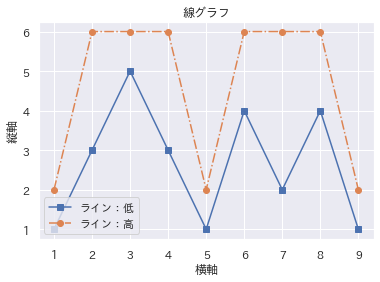

In [60]:
# matplotlibのインポート（pyplotをpltとして使用）
import matplotlib.pyplot as plt 

# 日本語表示への対応
import japanize_matplotlib  # 日本語化matplotlib
import seaborn as sns       # Matplotlibラッパ（フォント設定用）
sns.set(font="IPAexGothic") # 日本語フォント設定

# データの用意
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 4, 2, 4, 1]
y2 = [2, 6, 6, 6, 2, 6, 6, 6, 2]

# グラフのプロット
plt.plot(x, y1, ls='-', marker='s', label="ライン：低")
plt.plot(x, y2, ls='-.', marker='o', label="ライン：高")

# 軸ラベルなどの設定
plt.xlabel("横軸")        # 横軸ラベル
plt.ylabel("縦軸")        # 縦軸ラベル
plt.title("線グラフ")     # グラフタイトル
plt.legend()              # 凡例表示

# グラフの描画（ファイル、画面）
plt.savefig("graph.png")  # ファイルに保存
plt.show()                # グラフ描画

### 2.6.5 tensorflow

#### ライブラリ詳細

In [61]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: astunparse, numpy, keras-preprocessing, h5py, wrapt, grpcio, tensorboard, absl-py, protobuf, termcolor, flatbuffers, typing-extensions, opt-einsum, wheel, gast, tensorflow-estimator, six, google-pasta
Required-by: fancyimpute


In [62]:
import tensorflow as tf
tf.__version__

'2.4.1'

TensorFlowのオフィシャルページにて，最初に表示されるサンプルプログラム

https://www.tensorflow.org/overview?hl=ja

In [63]:
%%time

# モジュールインポート
import tensorflow as tf

# TensorFlow内のkerasのdatasetsを用いて
# mnistデータセットをダウンロード
mnist = tf.keras.datasets.mnist

# mnistデータをload_data()関数を用いてロード
# 学習データとテストデータに分かれる
# そして，データを正規化している
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# TensorFlow.kearsを用いてモデルを定義
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの学習設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train, epochs=5)

# モデルの評価
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4816 - accuracy: 0.8591
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1518 - accuracy: 0.9545
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0849 - accuracy: 0.9744
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9773
CPU times: user 18.4 s, sys: 2.18 s, total: 20.6 s
Wall time: 24.5 s


### 2.6.6 Keras

#### ライブラリ詳細

In [64]:
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: pyyaml, scipy, h5py, numpy
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [65]:
import tensorflow as tf
tf.keras.__version__

'2.4.0'